In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import os

In [2]:
# --- Load and prepare data ---
def load_data():
    df = pd.read_csv("data/fnb_sales.csv", parse_dates=["date"])
    df_grouped = df.groupby("date")["sales_amount"].sum().reset_index()
    df_grouped.columns = ["ds", "y"]
    return df_grouped



In [3]:
df=load_data()
df.head()

ds        y
0 2022-01-01  4164.65
1 2022-01-02  3214.49
2 2022-01-03  3342.37
3 2022-01-04  3662.48
4 2022-01-05  3897.82

In [4]:
# --- Train model ---
def train_model(df):
    model = Prophet(weekly_seasonality=True)
    model.fit(df)
    return model



In [5]:
model=train_model(df)

22:34:53 - cmdstanpy - INFO - Chain [1] start processing
22:34:53 - cmdstanpy - INFO - Chain [1] done processing


In [6]:
# --- Forecast future ---
def forecast_sales(model, periods=90):
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    return forecast

In [7]:
forecast=forecast_sales(model, periods=90)

In [8]:
# --- Plot forecast ---
def plot_forecast(model, forecast):
    fig = model.plot(forecast)
    plt.title("F&B Sales Forecast")
    plt.tight_layout()
    os.makedirs("outputs", exist_ok=True)
    plt.savefig("outputs/fnb_sales_forecast.png")
    plt.show()



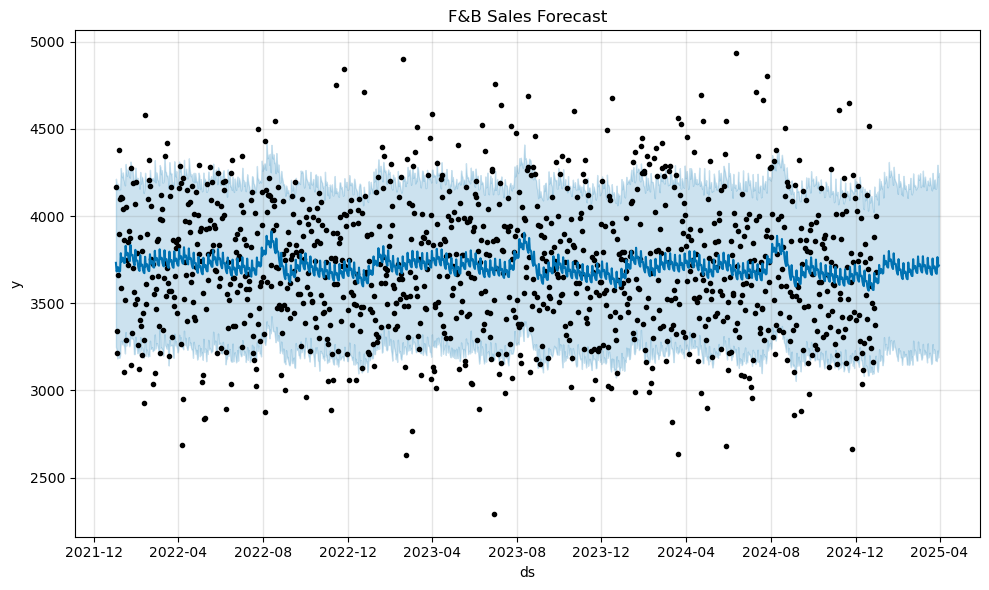

In [9]:
results=plot_forecast(model, forecast)

In [10]:
# --- Save forecast ---
def save_forecast(forecast):
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv("outputs/fnb_sales_forecast.csv", index=False)



In [11]:
forecast=save_forecast(forecast)

In [12]:
def main():
    df = load_data()
    model = train_model(df)
    forecast = forecast_sales(model)
    plot_forecast(model, forecast)
    save_forecast(forecast)
    print("✅ F&B Sales Forecast complete.")



22:34:55 - cmdstanpy - INFO - Chain [1] start processing
22:34:55 - cmdstanpy - INFO - Chain [1] done processing


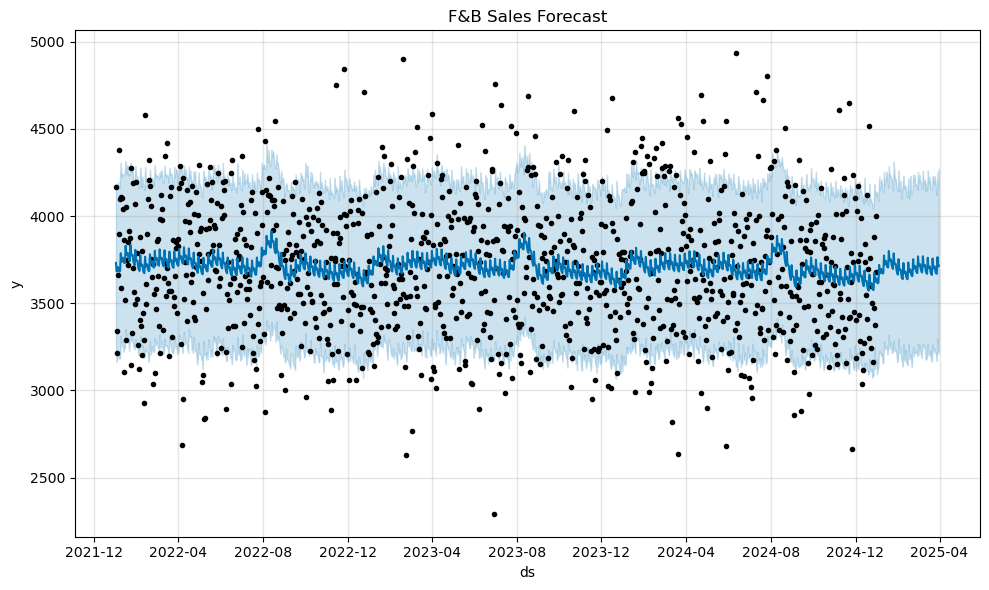

✅ F&B Sales Forecast complete.


In [13]:
if __name__ == "__main__":
    main()
